## Week 1. Lab Code  
  
\* doc : https://docs.scipy.org/doc/scipy/reference/stats.html  

In [3]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

**Peeking how to implement pdf function**

In [13]:
print(inspect.getsource(scipy.stats.norm._pdf))

print(inspect.getsource(scipy.stats.gamma._pdf))

    def _pdf(self, x):
        # norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
        return _norm_pdf(x)

    def _pdf(self, x, a):
        # gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
        return np.exp(self._logpdf(x, a))



### Part 1.1 Weak prior, weak likelihood

In [29]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

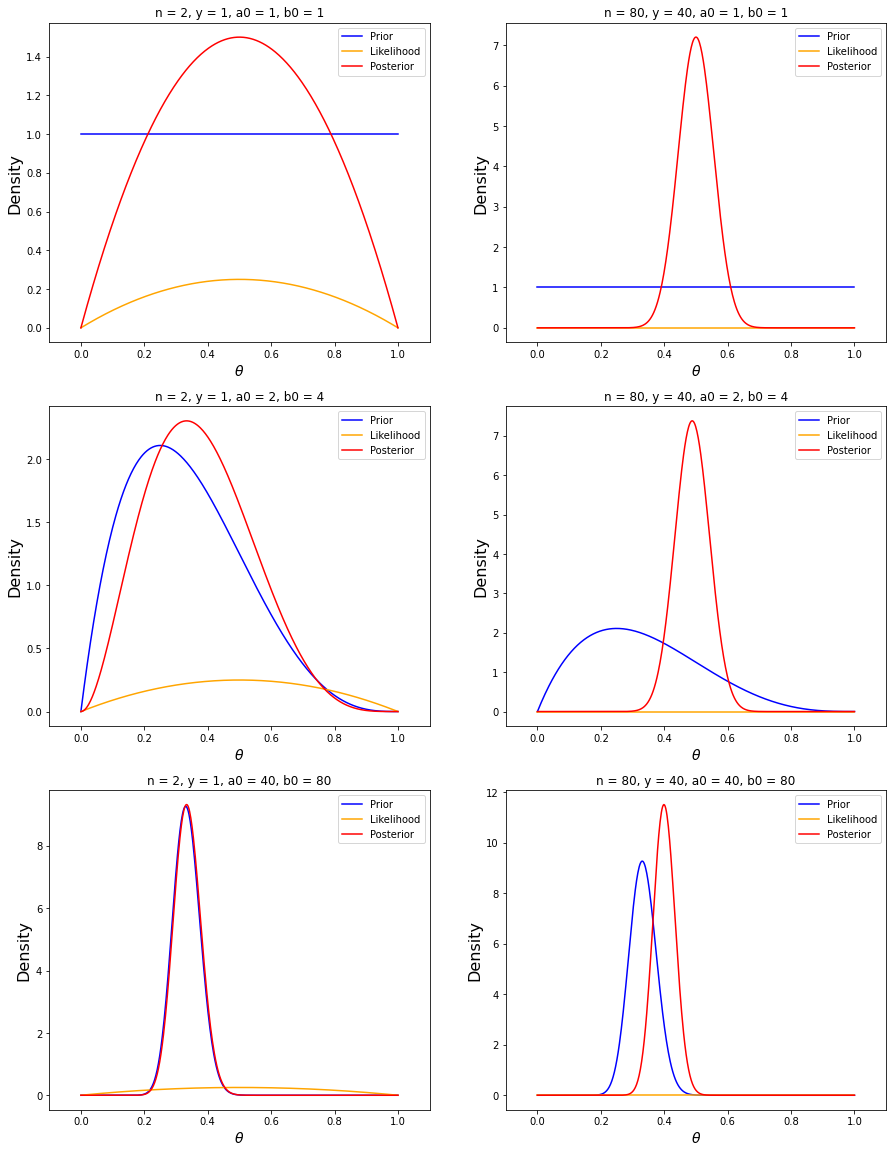

In [5]:
# Weak Likelihood
n = [2, 80]
y = [1, 40]

def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

# Prior
a0 = [1, 2, 40]
b0 = [1, 4, 80]
#prior = st.beta(a=a0, b=b0)

# Posterior
#post = st.beta(a=a0+y, b=b0+(n-y))

# plotting
fig, ax = plt.subplots(3, 2, figsize=(15,20))
thetas = np.linspace(0, 1, 500)

for i in range(3):
    for j in range(2):
        ax[i, j].plot(thetas, st.beta(a=a0[i], b=b0[i]).pdf(thetas), label='Prior', c='blue')
        ax[i, j].plot(thetas, likelihood(thetas, n[j], y[j]), label='Likelihood', c='orange')
        ax[i, j].plot(thetas, st.beta(a=a0[i]+y[j], b=b0[i]+(n[j]-y[j])).pdf(thetas), label='Posterior', c='red')
        ax[i, j].set_xlim([-0.10, 1.10])
        ax[i, j].set_xlabel(r'$\theta$', fontsize=14)
        ax[i, j].set_ylabel('Density', fontsize=16)
        ax[i, j].legend();
        ax[i, j].set_title("n = "+str(n[j])+ ", y = "+str(y[j])+", a0 = "+str(a0[i])+", b0 = "+str(b0[i]))

plt.show()

In [6]:
from ipywidgets import interact
import ipywidgets as widgets

def bayes(n,y,a,b):
    prior = st.beta(a=a, b=b)
    post = st.beta(a=a+y, b=b+(n-y))
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    ax.plot(thetas, likelihood(thetas, n, y), label='Likelihood', c='orange')
    ax.plot(thetas, post. pdf(thetas), label='Posterior', c='red')
    ax.set_title('n='+str(n)+', y='+str(y) + ', a=' + str(a)+ ', b=' + str(b))
    ax.set_xlim([-0.10, 1.10])
    ax.set_xlabel(r'$\theta$', fontsize=14)
    ax.set_ylabel('Density', fontsize=16)
    ax.legend()

interact(bayes, n=(10,20), y=(1,10), a=(1,20), b=(1,10))

interactive(children=(IntSlider(value=15, description='n', max=20, min=10), IntSlider(value=5, description='y'…

<function __main__.bayes(n, y, a, b)>

**Example 1 ) BDA p.37**

In [17]:
plt.rc('font', size=12)

# grid (theta)
x = np.linspace(0.375, 0.525, 150)

# posterior with data (y,n-y) = (437,543) and uniform prior Beta(1,1)
au = 438
bu = 544

# calculate densities
pdu = st.beta.pdf(x, au, bu)

# compare 3 cases
# arrays of different priors:
# Beta(0.485*n, (1-0.485)*n), for n = 2, 20, 200
ap = np.array([0.485 * (2*10**i) for i in range(3)])
bp = np.array([(1-0.485) * (2*10**i) for i in range(3)])
# corresponding posteriors with data (437,543)
ai = 437 + ap
bi = 543 + bp
# calculate prior and posterior densities
pdp = st.beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = st.beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

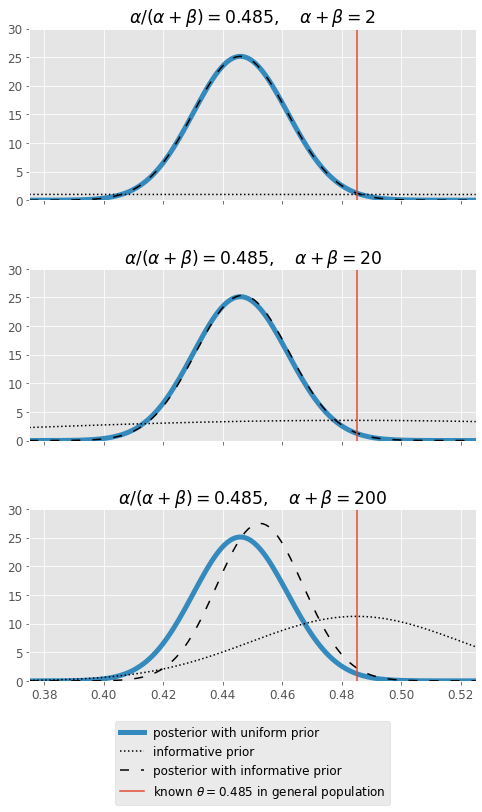

In [19]:
# plot 3 subplots
fig, axes = plt.subplots(
    nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 12))

# manually adjust spacing
fig.subplots_adjust(hspace=0.4)

# 3 subplots
for i, ax in enumerate(axes):
    # plot three precalculated densities
    post1, = ax.plot(x, pdu, color='C1', linewidth=5)
    prior, = ax.plot(x, pdp[i], 'k:')
    post2, = ax.plot(x, pdi[i], color='k', dashes=(6, 8))
    # add vertical line
    known = ax.axvline(0.485, color='C0')
    # set the title for this subplot
    ax.set_title(
        r'$\alpha/(\alpha+\beta) = 0.485,\quad \alpha+\beta = {}$'
        .format(2*10**i)
    )
# limit x-axis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,30))
# add legend to the last subplot
axes[-1].legend(
    (post1, prior, post2, known),
    ( 'posterior with uniform prior',
      'informative prior',
      'posterior with informative prior',
     r'known $\theta=0.485$ in general population'),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2)
);

### Part 2. HW  
**1) Part 1의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**  
  
  
**2) BDA 1.3 Exercise**  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes. 
  
  
**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**   
  
3-a) \textbf{Beta} distribution으로 위의 \textbf{belief}을 survival rate에 관한 \textbf{prior distribution}으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? 
(Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)
  
3-b) 이제 \textbf{data gathering}. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 \textbf{Posterior Distribution} 구하기.  
  
3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive) 

### 2)

![img](img/1.jpeg)

### 3-a) <br>
$\alpha$와 $\beta$에 대한 Beta distribution을 $\omega$를 mode, $\kappa$를 concentration으로 해석할 수 있다. 또한 $\omega = \frac{\alpha-1}{\alpha+\beta-2}$, $\kappa = \alpha+\beta$이다. 이에 맞춰서 $\alpha=91$, $\beta=11$로 해 보자.

이렇게 그래프를 그려보자.

Text(0.5, 1.0, 'Prior beta distribution')

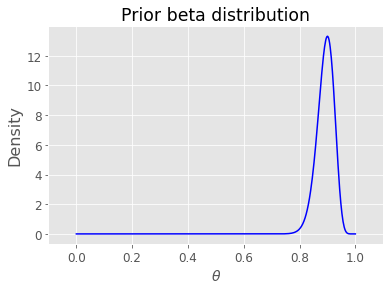

In [114]:
beta = st.beta(91, 11)

thetas = np.linspace(0, 1, 500)

plt.plot(thetas, beta.pdf(thetas), c='blue')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)

plt.title("Prior beta distribution")


### 3-b) <br>
10명 모두 생존 -> n=10, y=10으로 해서 posterior로 update해주면 된다.<br>
그러면 beta(91+10, 11)로 update 되는 것이다. 그래프로 그려보자.

Text(0.5, 1.0, 'Posterior and prior beta distribution')

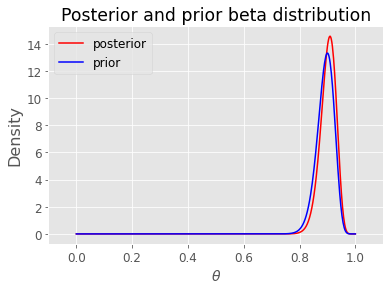

In [122]:
beta1 = st.beta(101, 11)

thetas = np.linspace(0, 1, 500)

plt.plot(thetas, beta1.pdf(thetas),label='posterior', c='red')
plt.plot(thetas, beta.pdf(thetas), label='prior', c='blue')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend()

plt.title("Posterior and prior beta distribution")

### 3-c) <br>
$X_{i}|\theta \sim Ber(\theta)$

$\theta \sim beta(91,11)$

$\theta\ |\ data \sim beta(101,11)$


$\begin{aligned}
P\left(x_{\text {new }} \mid \text { data }\right) &=\int_{0}^{1} P\left(x_{\text {new }} \mid \theta\right) p(\theta \mid \text { data }) d \theta \\
&=\int_{0}^{1} \theta^{x_{\text {new }}}(1-\theta)^{1-x_{\text {ne }} \omega} \frac{\Gamma(112)}{\Gamma(101) \Gamma(11)} \theta^{100}(1-\theta)^{10} d \theta \\
&=\int_{0}^{1} \theta^{100+x_{\text {new }}}(1-\theta)^{11-x_{\text {new }}} \frac{\Gamma(112)}{\Gamma(101) \Gamma(11)} d \theta \\
&=\frac{\Gamma\left(101+x_{\text {new }}\right) \Gamma\left(12-x_{\text {new }}\right)}{\Gamma(113)} \frac{\Gamma(112)}{\Gamma(101) \Gamma(11)} \\
p\left(x_{\text {new }}=1(\text { data })\right.&=\frac{\Gamma(102) \Gamma(11)}{\Gamma(113)} \frac{\Gamma(12)}{\Gamma(101) \Gamma(11)} \\
&=\frac{101}{112} \\
P\left(x_{\text {new }}=0 \mid \text { data }\right) &=1-\frac{101}{112}=\frac{11}{112}
\end{aligned}$

-> 다음 환자 생존 확률: $\frac{101}{112}$

20명 환자 중 2명 이상 사망할 확률: $1-\sum_{i=0}^1 {20 \choose i} \frac{101}{112}^{20-i} \frac{11}{112}^i \cong 0.60$